# SunPy 

## Python for Solar Physics

![](images/Beach_small.gif)

/home/dvd/Documents/Programming/workspace/pysolar/pysolar/time.py:106: UserWarning: I don't know about leap seconds after 2015
  (leap_seconds_base_year + len(leap_seconds_adjustments) - 1)


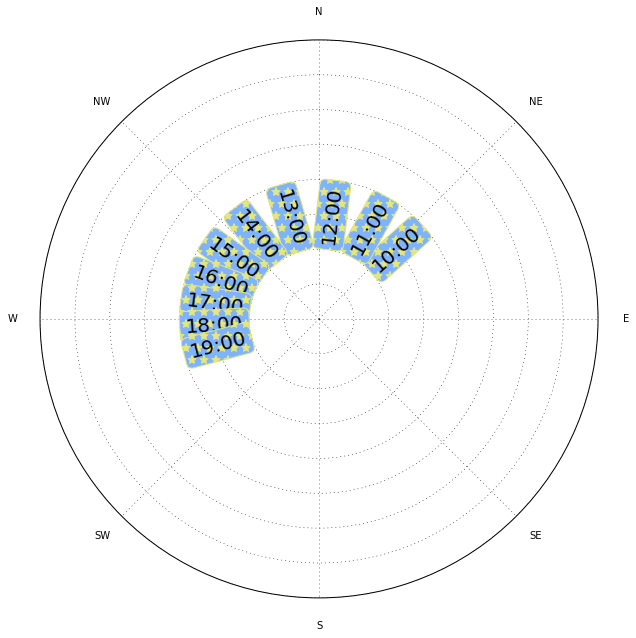

In [1]:
%matplotlib inline
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pysolar.solar

latitude_deg, longitude_deg = 49.6018598,11.010381
today = datetime.datetime(2016, 8, 25, 10, 0)

hours = [today + datetime.timedelta(hours=h) for h in range(10)]
angles = np.deg2rad([pysolar.solar.get_azimuth(latitude_deg, longitude_deg, h) for h in hours])

fig = plt.figure(figsize=(10,10))

ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_rlim([0,8])
ax.set_yticklabels([])
ax.set_xticks(np.pi/180. * np.linspace(180,  -180, 8, endpoint=False))
ax.set_xticklabels(['S', 'SE', 'E', 'NE', 'N', 'NW', 'W', 'SW'])

angles_h = (90 - np.rad2deg(angles) + 360) % 360
for hour, angle, angleh in zip(hours, angles, angles_h):
    if angleh > 90:
        angleh += 180
    plt.text(angle, 3, '{:%H:%M}'.format(hour), size=20, rotation=angleh,
             ha="center", va="center",
             bbox=dict(boxstyle="round",
                   ec=(0.9, 0.9, 0.5),
                   fc=(0.5, 0.7, 1),
                   hatch='*'
                   )
            )
plt.show()



![](images/TheSun_star.png)

In [10]:
from sunpy.net.helioviewer import HelioviewerClient
import matplotlib.pyplot as plt
from matplotlib.image import imread
hv = HelioviewerClient()
hvfile = hv.download_png('2016/08/25', 4.8,  6, "[SDO,AIA,AIA,304,1,100],[SDO,AIA,AIA,193,1,50],[SOHO,LASCO,C2,white-light,1,100]", x0=0, y0=0, width=768, height=768)
print(hvfile)
im = imread(hvfile)
plt.imshow(im)
plt.axis('off')
plt.show()

AttributeError: 'str' object has no attribute 'decode'


## History

## Before SunPy

### Solarsoft - (circa 1995)



![](images/solarsoft_tree.png)

- No Version control (their own mirroring system using perl and csh)
- Modification history is just as: 
```IDL:map2index.pro
;   History:
;      9-April-1998 - S.L.Freeland using struct2ssw & D.M. Zarro unpack_map 
;      3-March-2000 - S.L.Freeland - revised (made it work!)
;                     Use XCEN/YCEN centric and call to struct2ssw
;      4-March-2000 - S.L.Freeland - cont. 3-mar enhancments
;                     add CROTA and (opt CROTACEN if it exists)
;      18-Dec-2002 - Zarro (EER/GSFC), changed ROLL -> ROLL_ANGLE and
;                    converted some execute statements
;      12-Jan-2009 - Zarro (ADNET) - added CROTACN1,2
;      21-Sep-2010 - Zarro (ADNET) - added check for CROTA in INDEX
;
;
```

but not even with a consistent format

```IDL:plotbft.pro
; History: Nov, 1985,	Written, J.R. Lemen, MSSL
; 	Mar, 1986,	RDB+JRL - Improved titles; made compatible with EOF/MSSL
; 	May, 1986,	AF - change to use new two-component FIT files
; jul, 1991, atp - cut out some rubbish + transfered to idl2.
; Nov, 1991 AF - made it work again
; 	May, 1992 RDB	Cleaned up routine a lot; sped it up; got rid of
; 			redundant stuff to do with "transfer" from SMM
; Jun, 1992 Atp - finished, converted to structures, much updates
; 				much yet to do.
; 	july 1992 vn2.1 atp - cleaned up + finished (!)
; 	28-Feb-92 RDB	Changed VEL to BCS_IONVEL
; 	01-Mar-93 RDB	Added CLEARPLOT, CLEAR_UTPLOT at end
; 	02-Mar-92 RDB	Corrected PS_LONG and /LAND interaction
; 			Channel select now by integer
; 			Added prompt for pause when to screen
; 	18-May-94 RDB Fixed problem in creating tdx, and with plots
;
```
- Difficult to contribute to
- And therefore repetition:
  - 28275 files 
  - 4589 with the same name 
  - 553 called something2
- Different functions to do the same:
```IDL
> print, hel2xy('N30 W20')
280.67673   459.14901
> print, lonlat2xy('N30W20')
280.67228   459.07457
> print, hel2arcmin('N30', 'W20') * 60.
280.67673   459.14866
```

- Testing? Not such a thing
- Language require a expensive licence.
      There are free interpreter alternatives, though that doesn't solve the problems

- told to update "everyday!!" - that's why Arch is not much of a trouble for me!; Not known what have changed
- maybe by the initials in the history you may guess who was the last to modify it...
-  free alternatives language

![](images/SunPy.svg)

- version control (git/github) (easy to contribute!)
- testing and other continuous integration systems (travis)
- Engaged with other projects to avoid repetition



# Maps

- sun in multiple colors

- single with coordinates

(it's more than that, it contains coordinates information)

- composite

- cube (animation)

Thanks to:
astropy and glymur: read/write the file foramt
matplotlib: visualisation
wcslib: coordinates overlay.

skimage: diff-rot

In [1]:
import sunpy.map
from sunpy.net import vso
client = vso.VSOClient()
qr=client.query(vso.attrs.Time('2016-08-16 15:00:00', '2016-08-16 15:00:10'), vso.attrs.Instrument('aia'))
res = client.get(qr).wait()

/opt/anaconda/envs/py3all/lib/python3.5/site-packages/sunpy/map/mapbase.py:1590: Warning: WCSAxes is installed but not being used. Plots may not have the expected behaviour.
  Warning)
/opt/anaconda/envs/py3all/lib/python3.5/site-packages/sunpy/map/mapbase.py:1590: Warning: WCSAxes is installed but not being used. Plots may not have the expected behaviour.
  Warning)
/opt/anaconda/envs/py3all/lib/python3.5/site-packages/sunpy/map/mapbase.py:1590: Warning: WCSAxes is installed but not being used. Plots may not have the expected behaviour.
  Warning)
/opt/anaconda/envs/py3all/lib/python3.5/site-packages/sunpy/map/mapbase.py:1590: Warning: WCSAxes is installed but not being used. Plots may not have the expected behaviour.
  Warning)
/opt/anaconda/envs/py3all/lib/python3.5/site-packages/sunpy/map/mapbase.py:1590: Warning: WCSAxes is installed but not being used. Plots may not have the expected behaviour.
  Warning)
/opt/anaconda/envs/py3all/lib/python3.5/site-packages/sunpy/map/mapbase.py:

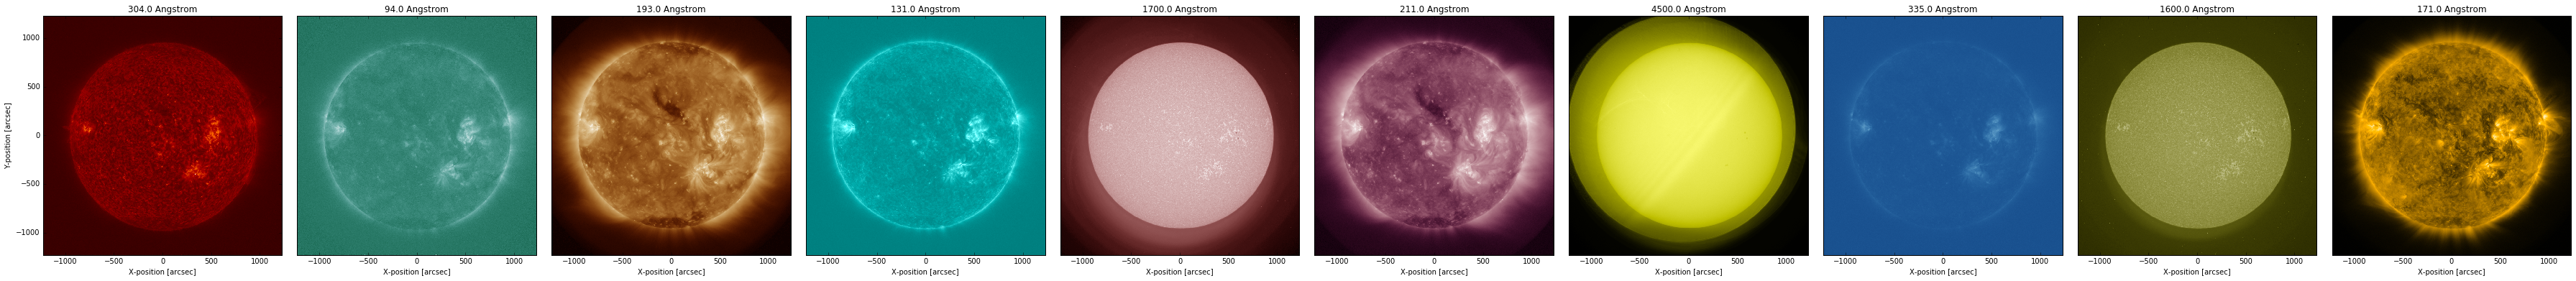

In [9]:
import matplotlib.pyplot as plt
import sunpy.map
import os

files = os.listdir(path='/home/dvd/sunpy/data/')
res = [xx for xx in files if xx.startswith('aia20160816_150000') and xx[-7:-4] != '.0.']

fig = plt.figure(figsize=(5 * len(res), 5))
for i, filei in enumerate(res):
    ax = fig.add_subplot(1, len(res), i+1)
    amap = sunpy.map.Map('/home/dvd/sunpy/data/' + filei)
    amap.plot()
    ax.set_title(amap.wavelength)
    if i > 0:
        ax.set_yticks([])
        ax.set_ylabel('')
plt.tight_layout()
plt.show()



![](https://github.com/Cadair/nam2015-sunpy-talk/raw/dd9db3fc471e9aacefae647a0756e6104d4f497b/images/astropy-logo.png)  /  Glymur ![]() 
![](http://matplotlib.org/_static/logo2.svg)

## composite and cube

In [ ]:
import numpy as np
# hmi, aia, rhessi - transparency and contour
import sunpy.data.sample
import sunpy.map

reshi = sunpy.map.Map(sunpy.data.sample.RHESSI_.RHESSI_IMAGE)

qr = client.query(vso.attrs.Time('2010-10-16 19:12:10', '2010-10-16 19:12:20'), vso.attrs.Instrument('aia'), vso.attrs.Wave(171 * u.AA, 171 * u.AA))
res = client.get(qr).wait()
aia = sunpy.map.Map(res)

qr2 = client.query(vso.attrs.Time('2010-10-16 19:12:00', '2010-10-16 19:13:00'), vso.attrs.Instrument('hmi'), vso.attrs.Physobs("LOS_magnetic_field"))
res2 = client.get(qr2).wait()
hmi = sunpy.map.Map(res2[0]).rotate()

flare = sunpy.map.Map(aia, hmi, reshi, composite=True)
flare.set_levels(2, np.arange(0,5,50), percent=True)
flare.set_alpha(1,0.5)
flare.set_vals(1, -200, 200) # with #1879
flare.set_colors(2, 'Reds_r')


ax = plt.subplot()
flare.plot()
ax.axis([200, 800, -600, -150])
plt.show()



# CME movie 2010-june-07

/opt/anaconda/envs/py3all/lib/python3.5/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/opt/anaconda/envs/py3all/lib/python3.5/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/opt/anaconda/envs/py3all/lib/python3.5/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/opt/anaconda/envs/py3all/lib/python3.5/site-packages/ipykernel/pylab/config.py:95: DeprecationWarning: metadata {'config': True} was set fr

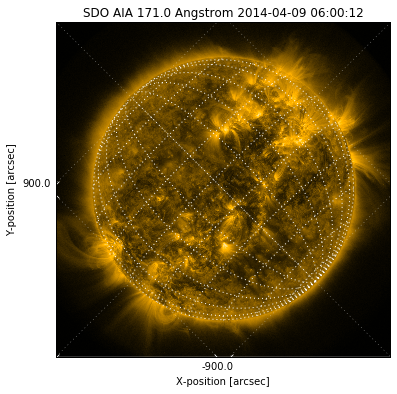

In [8]:
%matplotlib inline
import sunpy.map
from sunpy.data.sample import AIA_171_ROLL_IMAGE

import astropy.units as u

import matplotlib.pyplot as plt
# Coordinates
#Create a AIA 171 Map from some sample data
mymap = sunpy.map.Map(AIA_171_ROLL_IMAGE)

# Create a larger than normal figure
fig = plt.figure(figsize=(8,6))

# Plot the AIA Map object
im = mymap.plot()

# Overlay the Heliographic Coordinate Grid
l = mymap.draw_grid()

plt.show()


![](https://pbs.twimg.com/media/BsDLZznCQAAU_z4.png)

/home/dvd/Documents/Programming/workspace/sunpy/sunpy/map/mapbase.py:1590: Warning: WCSAxes is installed but not being used. Plots may not have the expected behaviour.
  Warning)
/home/dvd/Documents/Programming/workspace/sunpy/sunpy/map/mapbase.py:1590: Warning: WCSAxes is installed but not being used. Plots may not have the expected behaviour.
  Warning)


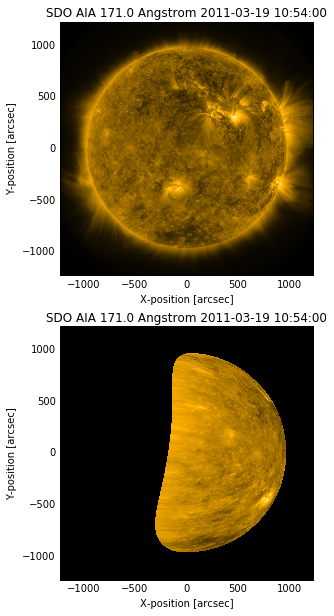

In [3]:
# diffrot #1876
%matplotlib inline
from datetime import timedelta
import matplotlib.pyplot as plt

import sunpy.map
import sunpy.data.sample
from sunpy.physics import differential_rotation

aia = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)
aia_rot = differential_rotation.difrot_map(aia, timedelta(6))
fig = plt.figure(figsize=(5, 10))
ax1 = plt.subplot(211)
aia.plot()
ax2 = plt.subplot(212)
aia_rot.plot()
plt.show()

![](http://scikit-image.org/_static/img/logo.png)

# Lightcurvess

(via Astropy.Tables, Pandas)

In [5]:
# some new stuff from Alex

# Download (and database)

(via sqlalchemy, beautiful soup, ..)

In [7]:
# Something from fido

# Coordinates

(via astropy)

In [9]:
# example from  Stuart: stereo and sdo

# Affiliated packages

- extrapolation example (via mayavi)
- cube

# Missions

- no support to all missions (as ssw gen)
- 

![](images/dkist_sunpy.png)

![](https://sites.google.com/site/dkistcommunityworkshop1/_/rsrc/1454971499296/config/customLogo.gif?revision=1)

![](https://c1.staticflickr.com/8/7676/27160915552_713795d3f9_b.jpg)